In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread, imread_collection
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import torch
import pickle
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
## Load in images 
directory = "./images/"
img_list = os.listdir(directory)
real_imgs = [directory + x for x in img_list if "real_A" in x]
pred_imgs = [directory + x for x in img_list if "fake_B" in x]
real_imgs.sort()
pred_imgs.sort()
img_real = np.array(imread_collection(real_imgs))
img_pred = np.array(imread_collection(pred_imgs))

In [19]:
## Train K Means for MUSE
img_train = img_real[[9,33]]
img_train_MUSE = img_train.flatten().reshape(-1,3)
kmeans_MUSE = KMeans(n_clusters=2, random_state=0, n_jobs=2).fit(img_train_MUSE)

In [20]:
## Train K Means for H & E 
img_train = img_pred[[5]]
img_train_HE = img_train.flatten().reshape(-1,3)
kmeans_HE = KMeans(n_clusters=2, random_state=0, n_jobs=2).fit(img_train_HE)

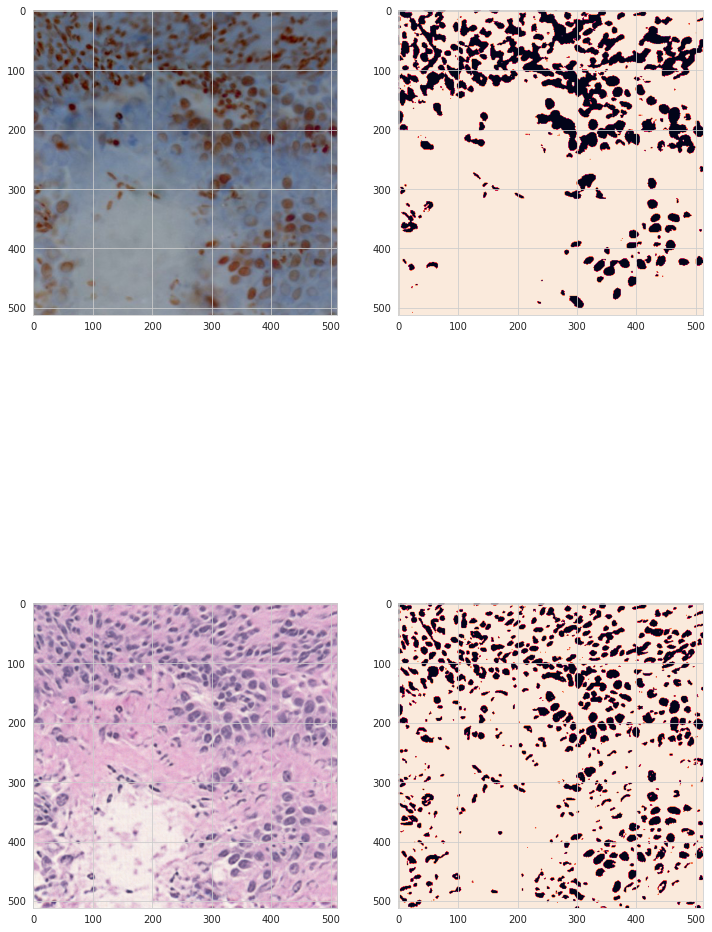

In [24]:
## View segmentation mask for MUSE and predicted H & E
idx = 33
img_muse = img_real[idx].flatten().reshape(-1,3)
muse_pred = kmeans_MUSE.predict(img_muse)
muse_pred[muse_pred==1] = 2
muse_pred[muse_pred==0] = 3
plt.figure(figsize=(12,20))
plt.subplot(2,2,1)
plt.imshow(img_muse.reshape(512,512,3))
plt.subplot(2,2,2)
plt.imshow(muse_pred.reshape(512,512))
plt.subplot(2,2,3)
plt.imshow(img_pred[idx])
plt.subplot(2,2,4)
pred = kmeans_HE.predict(img_pred[idx].flatten().reshape(-1,3))
pred[pred==1] = 2
pred[pred==0] = 3
plt.imshow(pred.reshape(512,512) )

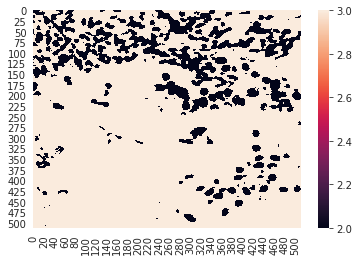

In [25]:
sns.heatmap(muse_pred.reshape(512,512))

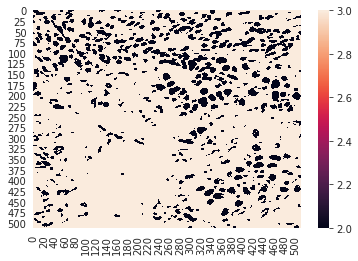

In [26]:
sns.heatmap(pred.reshape(512,512))

In [29]:
filename = "kmeans_HE.sav"
filename1 = "kmeans_MUSE.sav"
pickle.dump(kmeans_HE, open(filename, 'wb'))
pickle.dump(kmeans_MUSE, open(filename1, 'wb'))

In [30]:
np.mod(np.mean(muse_pred- pred)

-0.011096954345703125